In [115]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [116]:
# loading Data set 

train_data = pd.read_csv('data/P01_train.csv')
test_data = pd.read_csv('data/P01_test.csv')

In [117]:
# Head will display top 5 rows of data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
# Data Describtion 
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [119]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
# checking null values

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

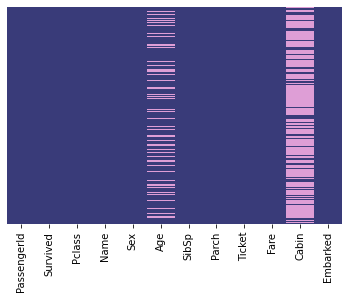

In [120]:
# we can create a visulazation for view the null values as well. 
sns.heatmap(train_data.isnull(),yticklabels=False, cbar=False, cmap='tab20b')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

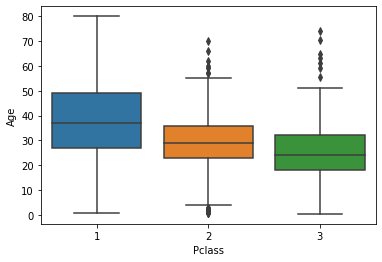

In [121]:
sns.boxplot(x='Pclass',y='Age',data=train_data)

In [128]:
test_df = train_data
test_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [129]:
# Handeling Missing values 
# Cabin column is not of much use for our analysis as this contain the cabin number which is not a categorial variable
# So let handle the age and Embarked columns

p1_age = round(train_data['Age'][train_data['Pclass']==1].mean())
p2_age = round(train_data['Age'][train_data['Pclass']==2].mean())
p3_age = round(train_data['Age'][train_data['Pclass']==3].mean())

def fill_age(df):
    if pd.isnull(df['Age'].values[0]):
        if df['Pclass'].values[0] == 1:
            return p1_age
        elif df['Pclass'].values[0] == 1:
            return p2_age
        else:
            return p3_age


#  for i in test_df:
#     if pd.isnull(test_df['Age']):
#         test_var = test_df['Pclass']
#         test_df['Age'] = round(train_data['Age'][train_data['Pclass']==test_var].mean())


In [132]:
test_df['Age'] = test_df[['Age','Pclass']].apply(fill_age,axis=1)
test_df.isnull().sum()

AttributeError: 'numpy.float64' object has no attribute 'values'

In [137]:
df_num = train_data[['Age','SibSp','Parch','Fare']]
df_cat = train_data[['Survived', 'Pclass', 'Sex', 'Embarked']]

In [138]:
# hist; bar; bar-vs
def plot_grid(df, typ):    
    figure, axis = plt.subplots(int(np.ceil(df.shape[1]/2)) , 2) 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    x= 0
    y=0
    for i in df.columns:
        if x==2:
            x=0
            y=y+1
        if typ=="hist":
            axis[x, y].hist(df[i])
        elif typ=="bar":
            emb = df[i].value_counts()
            axis[x, y].bar(x=emb.index, height=emb.values)
        axis[x, y].set_title(i)
        x=x+1

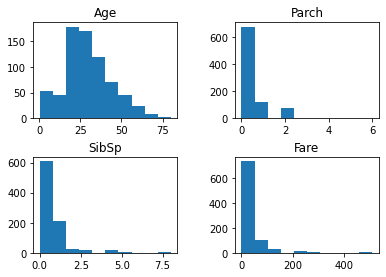

In [63]:
# plot_grid(df_num,fig_size=(10,50), grid_size=(20,4), plot_type='histplot')

figure, axis = plt.subplots(2, 2) 
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)


#axis[0, 0].hist(df_num['Age'])
#axis[1, 0].hist(df_num['Fare'])

x= 0
y=0
for i in df_num.columns:
    if x==2:
        x=0
        y=y+1
    axis[x, y].hist(df_num[i])
    axis[x, y].set_title(i)
    x=x+1

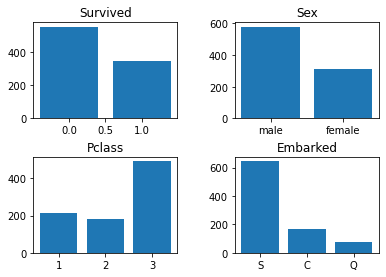

In [139]:
plot_grid(df_cat,"bar")

In [103]:
round(train_data['Age'][train_data['Pclass']==1].mean())

38

C:\Users\prost\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


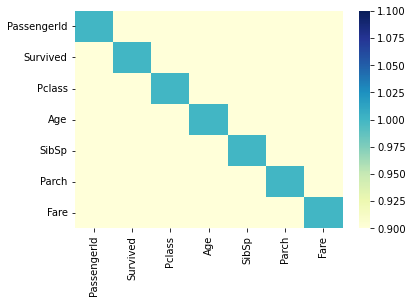

In [141]:
# We can plot correlation in heat map as well

# train_data.corr()
sns.heatmap(train_data.corr(),y, cmap="YlGnBu")
plt.show()